In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('move.csv')
df.head()

,Unnamed: 0,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [36]:
df['provider'].value_counts()

realtor                          615
realtor                          415
owner                            238
agency                            92
Застройщик                        68
agency                            10
agency                             8
Name: provider, dtype: int64

In [37]:
df['area'] = df['living_area'] + df['kitchen_area'] + df['total_area']

In [38]:
df.drop(['Unnamed: 0','metro'],axis=1,inplace=True)

In [39]:
(df.isna().sum() / df.shape[0]).sort_values()

price           0.0
way             0.0
views           0.0
provider        0.0
fee_percent     0.0
storey          0.0
minutes         0.0
storeys         0.0
living_area     0.0
kitchen_area    0.0
total_area      0.0
area            0.0
dtype: float64

In [40]:
df.head()

,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area,area
0,45000,walk,513,realtor,50,7,10,12,19,8,38,65
1,50000,walk,389,realtor,50,16,10,16,18,8,41,67
2,50000,walk,483,realtor,50,5,3,12,19,5,33,57
3,38000,walk,414,realtor,50,3,15,5,37,37,37,111
4,55999,walk,360,realtor,99,6,7,17,21,10,40,71


In [41]:
var_cat = []

for col in df.select_dtypes('object'):
    var_cat.append(col)
var_cat

['way', 'provider']

In [43]:
var_num = []
for col in df.select_dtypes('int'):
    var_num.append(col)
var_num

['price',
 'views',
 'fee_percent',
 'storey',
 'minutes',
 'storeys',
 'living_area',
 'kitchen_area',
 'total_area',
 'area']

In [44]:
df_cat = df[var_cat]
df_cat

,way,provider
0,walk,realtor
1,walk,realtor
2,walk,realtor
3,walk,realtor
4,walk,realtor
...,...,...
1441,walk,realtor
1442,walk,realtor
1443,walk,realtor
1444,walk,realtor


In [45]:
df_cat = pd.get_dummies(df_cat , drop_first=True)
df_cat

,way_walk,provider_agency,provider_agency,provider_owner,provider_realtor,provider_realtor,provider_Застройщик
0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0
4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
1441,1,0,0,0,1,0,0
1442,1,0,0,0,1,0,0
1443,1,0,0,0,1,0,0
1444,1,0,0,0,1,0,0


In [46]:
df_num = df[var_num]
df_num

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area,area
0,45000,513,50,7,10,12,19,8,38,65
1,50000,389,50,16,10,16,18,8,41,67
2,50000,483,50,5,3,12,19,5,33,57
3,38000,414,50,3,15,5,37,37,37,111
4,55999,360,99,6,7,17,21,10,40,71
...,...,...,...,...,...,...,...,...,...,...
1441,25000,189,0,6,5,23,20,10,36,66
1442,25000,173,0,5,5,17,20,10,38,68
1443,25000,102,0,5,5,12,20,10,35,65
1444,40000,60,30,3,17,9,20,8,35,63


In [47]:
# Concaténer les deux dataframe
df_encoded = pd.concat([df_cat , df_num] , axis=1)
df_encoded

,way_walk,provider_agency,provider_agency,provider_owner,provider_realtor,provider_realtor,provider_Застройщик,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area,area
0,1,0,0,0,0,1,0,45000,513,50,7,10,12,19,8,38,65
1,1,0,0,0,0,1,0,50000,389,50,16,10,16,18,8,41,67
2,1,0,0,0,0,1,0,50000,483,50,5,3,12,19,5,33,57
3,1,0,0,0,0,1,0,38000,414,50,3,15,5,37,37,37,111
4,1,0,0,0,0,1,0,55999,360,99,6,7,17,21,10,40,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,1,0,0,0,1,0,0,25000,189,0,6,5,23,20,10,36,66
1442,1,0,0,0,1,0,0,25000,173,0,5,5,17,20,10,38,68
1443,1,0,0,0,1,0,0,25000,102,0,5,5,12,20,10,35,65
1444,1,0,0,0,1,0,0,40000,60,30,3,17,9,20,8,35,63


In [141]:
X = df_encoded.drop(['price','fee_percent'],axis=1)
y = df_encoded['price']

In [142]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [143]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [144]:
model = make_pipeline(StandardScaler(),GradientBoostingRegressor())
model.fit(X_train , y_train)
model.score(X_test,y_test)

0.9440427312734068

In [145]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=3).mean()

0.6556928306037795

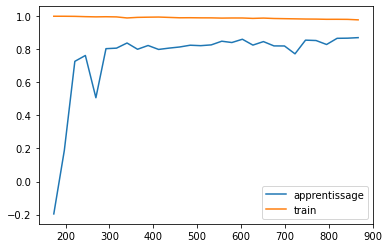

In [138]:
from sklearn.model_selection import learning_curve

N , train_score , val_score = learning_curve(model , X_train , y_train , train_sizes=np.linspace(0.2,1.0,30) , cv=4)

plt.plot(N , val_score.mean(axis=1) , label = 'apprentissage')
plt.plot(N , train_score.mean(axis=1) , label = 'train')
plt.legend()

In [147]:
y_pred = model.predict(X_test)

In [66]:
r2_score(y_test,y_pred)

0.9481726411356448

In [69]:
print(y_pred[0:10])

[38730.97006426 56523.77036683 26355.82567588 59495.11965904
 38166.553432   38997.61409094 38997.61409094 39481.74171582
 21962.73877993 44743.82590868]


In [70]:
print(y_test[0:10])

1369    38000
229     45000
992     25000
137     60000
702     40000
765     40000
735     40000
1186    40000
1016    20000
1108    45000
Name: price, dtype: int64


In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

In [150]:
mean_squared_log_error(y_test,y_pred)

0.021780633050833303